# Quaternions
based on:

https://towardsdatascience.com/better-rotation-representations-for-accurate-pose-estimation-e890a7e1317f

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html

https://quaternions.online/


## Intro

### Rotation matrix
 $R =\begin{bmatrix} r_{11} & r_{12} & r_{13}& \\ r_{21} & r_{22} & r_{r23} \\ r_{31} & r_{32} & r_{33} \end{bmatrix}$
, $R^{T}R=I, det(R)=1$

* we have 9 parameters to represent 3d rotation 

### Euler angles
$R_{x}(\alpha) =\begin{bmatrix} 1 & 0 & 0& \\ 0 & cos(\alpha) & -sin(\alpha) \\ 0 & sin(\alpha) & cos(\alpha) \end{bmatrix}$

$R_{y}(\beta) =\begin{bmatrix} cos(\beta) & 0 & sin(\beta)& \\ 0 & 1 & 0 \\ -sin(\beta) & 0 & cos(\beta) \end{bmatrix}$

$R_{z}(\gamma) =\begin{bmatrix} cos(\gamma) & -sin(\gamma) & 0 & \\ sin(\gamma) & cos(\gamma) & 0 \\ 0 & 0 & 1 \end{bmatrix}$

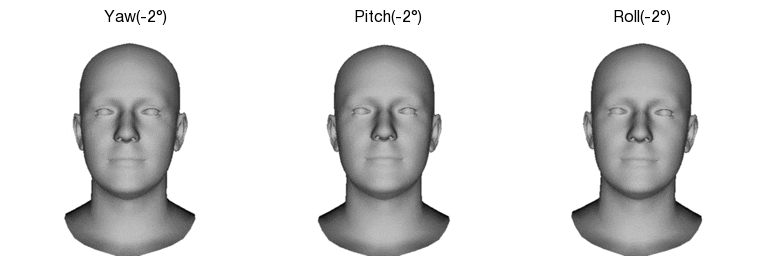


#### Rotation order
* $R=R_{x}R_{y}R_{z}
we can multiply the 3 matrixes in diffrent order and get diffrent! orientation


### Quaternion rotation
a rotation around a fixed point by $\theta$ [rad] about a unit axis(X,Y,Z) is given by:
$(C,X*S,Y*S,Z*S)$
$C=cos(\theta/2), S=sin(\theta/2)$

## Examples
I would like to get the linear acceleration in "up" direction
and in walking direction.
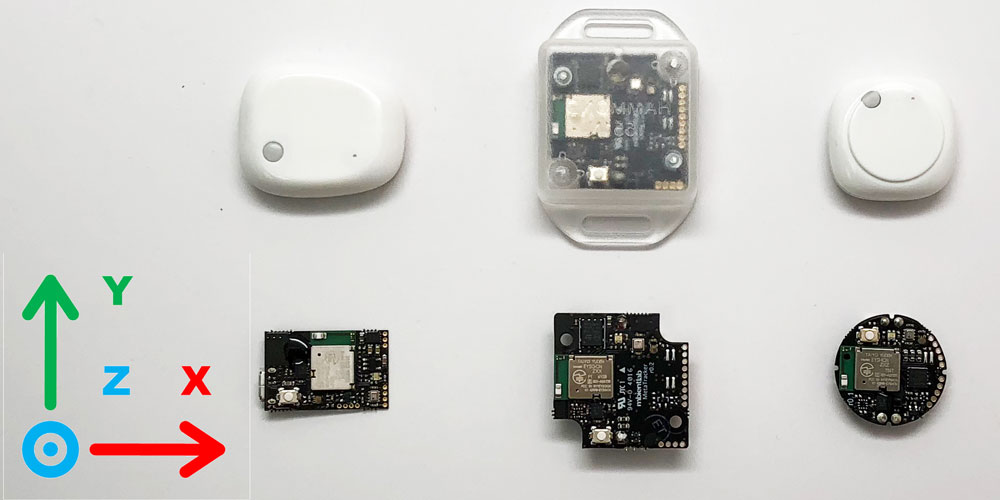

### Example1: order of rotation and initial orientation
will create 2 measurement:
1.  will start at the orientation in the picture while the z-axis is up(against gravity) and the x-axis along the the table long side
file name='rpy_xyz_45_start_z_up_C3B3_2023-04-11T13.58.53.014_C3B38AD76217_Quaternion_100.000Hz.csv'
than 30 x--> 30 y--> 30 z and back until (0,0,0)
2. the same as (1), but will start with the y-axis up(x rotated about 90 degrees)
file name='rpy_xyz_45_start_y_up_C3B3_2023-04-11T14.04.47.548_C3B38AD76217_Quaternion_100.000Hz.csv'


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

In [2]:
# load files
path='./data/'
fileQ1='rpy_xyz_45_start_z_up_C3B3_2023-04-11T13.58.53.014_C3B38AD76217_Quaternion_100.000Hz.csv'
fileQ2='rpy_xyz_45_start_y_up_C3B3_2023-04-11T14.04.47.548_C3B38AD76217_Quaternion_100.000Hz.csv'
cols=['epoch','time','elapsed']
colsQ=cols+['qw','qx','qy','qz']
dfQ1=pd.read_csv(path+fileQ1,names=colsQ)
dfQ2=pd.read_csv(path+fileQ2,names=colsQ)

In [3]:
# create scipy.Rotate object from quaternions measurements
r1=R.from_quat(dfQ1.iloc[1:,[4,5,6,3]])
r2=R.from_quat(dfQ2.iloc[1:,[4,5,6,3]])

# define 
SEQ='XYZ'

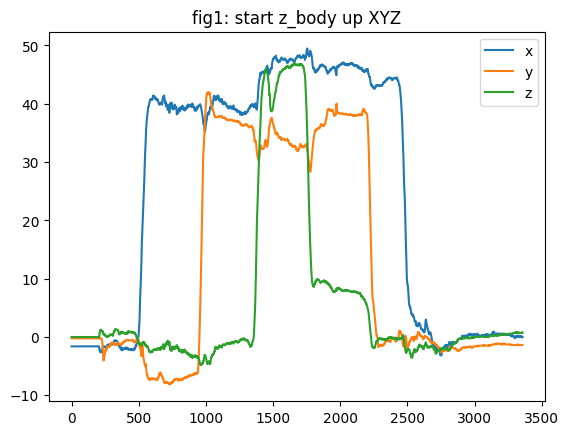

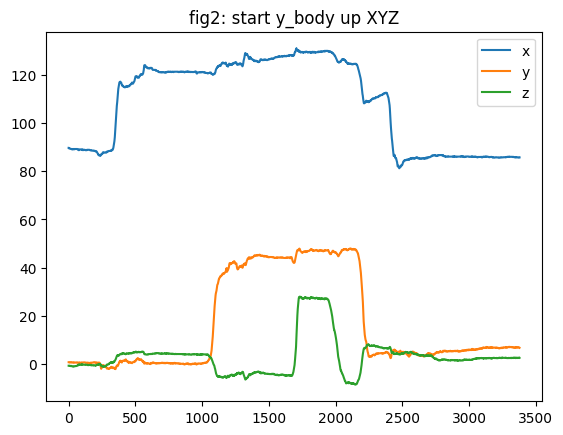

In [4]:
# PRESENT angles calculated from the sensor quaternions 
## measurements

# present "fig1: start z_body up"
angles1=r1.as_euler(seq=SEQ, degrees=True)
pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
plt.figure()
plt.plot(pitch_from_quat)
plt.plot(roll_from_quat)
plt.plot(yaw_from_quat)
plt.legend(['x','y','z'])
plt.title('fig1: start z_body up '+SEQ)
plt.show()

# present "fig2: start y_body up"
angles2=r2.as_euler(seq=SEQ, degrees=True)
pitch_from_quat, roll_from_quat, yaw_from_quat=angles2[:,0], angles2[:,1],angles2[:,2]
plt.figure()
plt.plot(pitch_from_quat)
plt.plot(roll_from_quat)
plt.plot(yaw_from_quat)
plt.legend(['x','y','z'])
plt.title('fig2: start y_body up '+SEQ)
plt.show()

### Example1 conclusions: order of rotation and initial orientation
1. The sensor will start in (0,0,0) if the sensor z axis is up
2. 

### Example2: initial heading
will create 2 measurement:
1.  will start at the orientation in the picture while the z-axis is up(against gravity) and the **y-axis** along the table long side
file name='xyz_z_up_y_along_table_C3B3_2023-04-13T07.25.13.493_C3B38AD76217_Quaternion_100.000Hz.csv'
than 30 x--> 30 y--> 30 z and back until (0,0,0)

In [5]:
# load files
path='./data/'
fileQ1='xyz_z_up_y_along_table_C3B3_2023-04-13T07.25.13.493_C3B38AD76217_Quaternion_100.000Hz.csv'
# fileQ2='rpy_xyz_45_start_y_up_C3B3_2023-04-11T14.04.47.548_C3B38AD76217_Quaternion_100.000Hz.csv'
cols=['epoch','time','elapsed']
colsQ=cols+['qw','qx','qy','qz']
dfQ1=pd.read_csv(path+fileQ1,names=colsQ)
# dfQ2=pd.read_csv(path+fileQ2,names=colsQ)

In [6]:
# create scipy.Rotate object from quaternions measurements
r1=R.from_quat(dfQ1.iloc[1:,[4,5,6,3]])
# r2=R.from_quat(dfQ2.iloc[1:,[4,5,6,3]])

# define 
SEQ='XYZ'

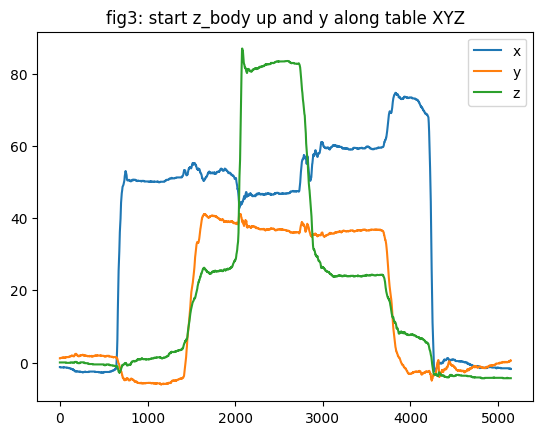

In [7]:
# PRESENT angles calculated from the sensor quaternions 
## measurements

# present "fig3: start z_body up and y along table"
angles1=r1.as_euler(seq=SEQ, degrees=True)
pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
plt.figure()
plt.plot(pitch_from_quat)
plt.plot(roll_from_quat)
plt.plot(yaw_from_quat)
plt.legend(['x','y','z'])
plt.title('fig3: start z_body up and y along table '+SEQ)
plt.show()


### Example2 conclusions: order of rotation and initial orientation
1. 

### Example3: linear acceleration orientation
will create 2 measurement:
**the global axes**- x_global(along the table, always the same), z_global(up)
1.  * will start with sensor-x-axis along table and sensor-**z**-axis up

* will rotate about 45 deg in x than another 45 in the new y than another 45 in the new z
* will accelerate in x_global-->y_global-->z_global
* will rotate to init orientation
* will accelerate in x_global-->y_global-->z_global

fileQ='xyz_acc_rotated_than no_rotated_B3_2023-04-13T08.20.32.287_C3B38AD76217_Quaternion.csv'
fileLA='xyz_acc_rotated_than no_rotated_B3_2023-04-13T08.20.32.287_C3B38AD76217_LinearAcceleration.csv'


2.  * will start with sensor-x-axis along table and sensor-**y**-axis up

* will rotate about 45 deg in sensor-x-axis than another 45 in the sensor-y-axis than another 45 in the sensor-z-axis
* will accelerate in x_global-->y_global-->z_global
* will rotate to init orientation
* will accelerate in x_global-->y_global-->z_global

fileQ='xyz_acc_rotated_than_no_rotated_y_up_3_2023-04-13T10.54.41.601_C3B38AD76217_Quaternion.csv'

fileLA='xyz_acc_rotated_than_no_rotated_y_up_3_2023-04-13T10.54.41.601_C3B38AD76217_LinearAcceleration.csv'

In [8]:
# load files
path='./data/'
fileQ_z_up='xyz_acc_rotated_than no_rotated_B3_2023-04-13T08.20.32.287_C3B38AD76217_Quaternion.csv'
fileLA_z_up='xyz_acc_rotated_than no_rotated_B3_2023-04-13T08.20.32.287_C3B38AD76217_LinearAcceleration.csv'

fileQ_y_up='xyz_acc_rotated_than_no_rotated_y_up_3_2023-04-13T10.54.41.601_C3B38AD76217_Quaternion.csv'
fileLA_y_up='xyz_acc_rotated_than_no_rotated_y_up_3_2023-04-13T10.54.41.601_C3B38AD76217_LinearAcceleration.csv'

cols=['epoch','time','elapsed']
colsQ=cols+['qw','qx','qy','qz']
colsLA=cols+['ax','ay','az']
dfQ_z_up=pd.read_csv(path+fileQ_z_up,names=colsQ)
dfLA_z_up=pd.read_csv(path+fileLA_z_up,names=colsLA)

dfQ_y_up=pd.read_csv(path+fileQ_y_up,names=colsQ)
dfLA_y_up=pd.read_csv(path+fileLA_y_up,names=colsLA)

In [9]:
# create scipy.Rotate object from quaternions measurements
r_z_up=R.from_quat(dfQ_z_up.iloc[1:,[4,5,6,3]])
r_y_up=R.from_quat(dfQ_y_up.iloc[1:,[4,5,6,3]])

# define 
SEQ='XYZ'

# rotate linear acceleration
LA_z_up=dfLA_z_up.iloc[1:,[3,4,5]].to_numpy(dtype=np.float32)
LA_rot_z_up=r_z_up.apply(LA_z_up,inverse=False)

LA_y_up=dfLA_y_up.iloc[1:,[3,4,5]].to_numpy(dtype=np.float32)
LA_rot_y_up=r_y_up.apply(LA_y_up,inverse=False)

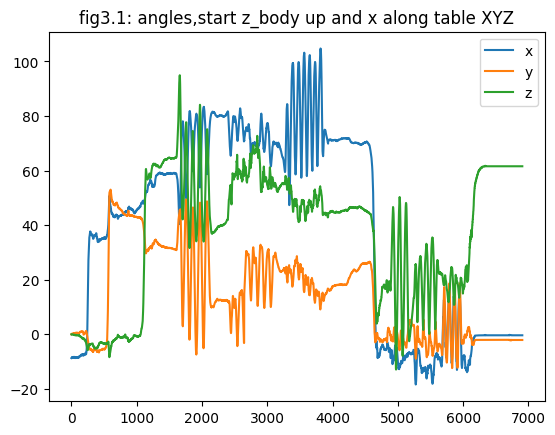

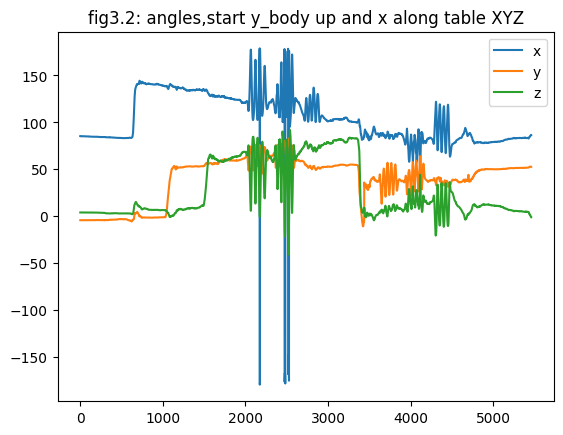

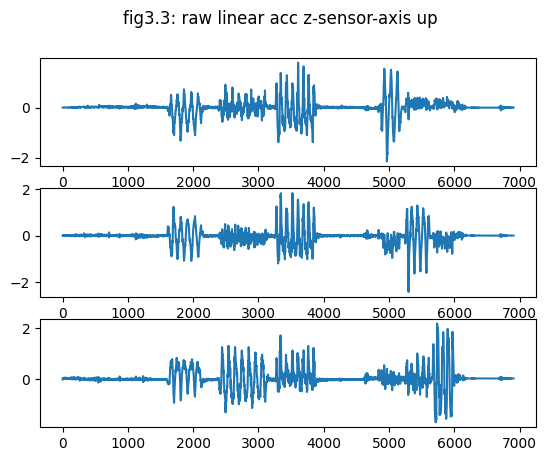

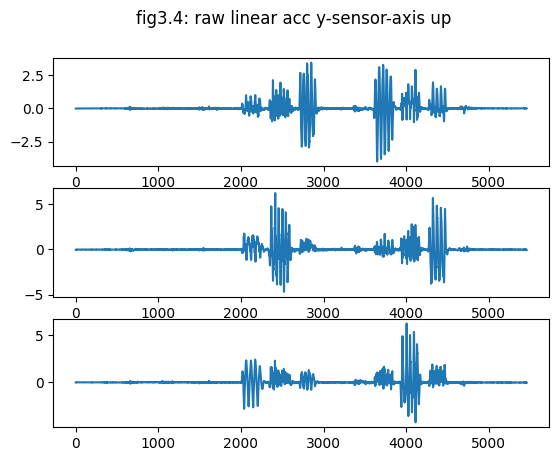

<Figure size 640x480 with 0 Axes>

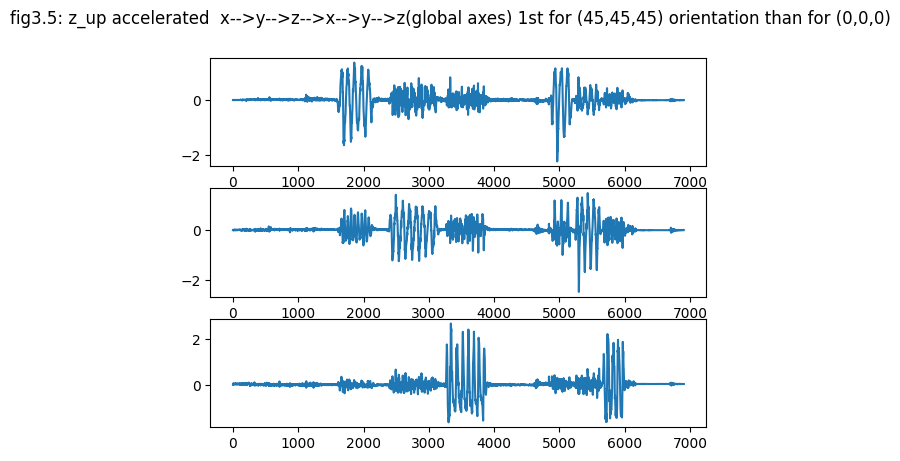

<Figure size 640x480 with 0 Axes>

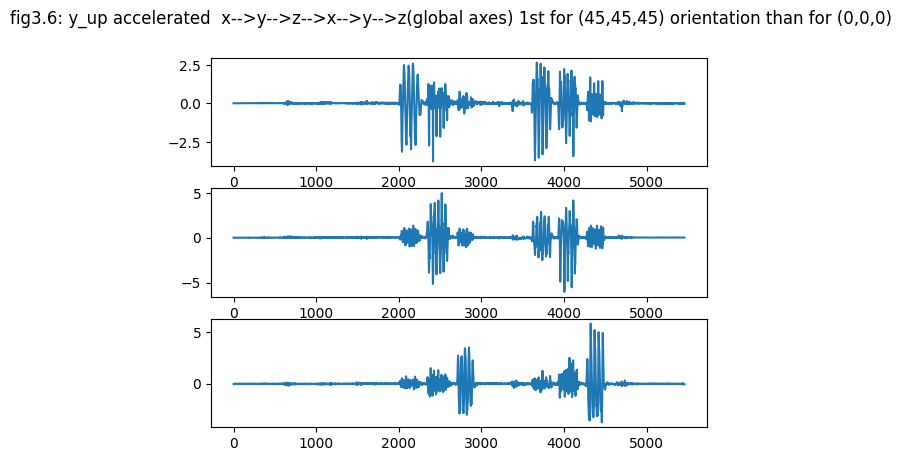

In [10]:
# PRESENT angles calculated from the sensor quaternions 
## measurements

# present "fig3.1: start z_body up and x along table"
angles1=r_z_up.as_euler(seq=SEQ, degrees=True)
pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
plt.figure()
plt.plot(pitch_from_quat)
plt.plot(roll_from_quat)
plt.plot(yaw_from_quat)
plt.legend(['x','y','z'])
plt.title('fig3.1: angles,start z_body up and x along table '+SEQ)
plt.show()

# present "fig3.2: start y_body up and x along table"
angles1=r_y_up.as_euler(seq=SEQ, degrees=True)
pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
plt.figure()
plt.plot(pitch_from_quat)
plt.plot(roll_from_quat)
plt.plot(yaw_from_quat)
plt.legend(['x','y','z'])
plt.title('fig3.2: angles,start y_body up and x along table '+SEQ)
plt.show()

# present "fig3.3: raw acc z up 
f,ax=plt.subplots(3)
ax[0].plot(LA_z_up[:,0])
ax[1].plot(LA_z_up[:,1])
ax[2].plot(LA_z_up[:,2])
# plt.legend(['x','y','z'])
plt.suptitle('fig3.3: raw linear acc z-sensor-axis up')
plt.show()

# present "fig3.4: raw acc y up 
f,ax=plt.subplots(3)
ax[0].plot(LA_y_up[:,0])
ax[1].plot(LA_y_up[:,1])
ax[2].plot(LA_y_up[:,2])
# plt.legend(['x','y','z'])
plt.suptitle('fig3.4: raw linear acc y-sensor-axis up')
plt.show()


# present "fig3.5: 
plt.figure()
f,ax=plt.subplots(3)
ax[0].plot(LA_rot_z_up[:,0])
ax[1].plot(LA_rot_z_up[:,1])
ax[2].plot(LA_rot_z_up[:,2])
plt.suptitle('fig3.5: z_up accelerated  x-->y-->z-->x-->y-->z(global axes) 1st for (45,45,45) orientation than for (0,0,0)')
plt.show()

# present "fig3.6: 
plt.figure()
f,ax=plt.subplots(3)
ax[0].plot(LA_rot_y_up[:,0])
ax[1].plot(LA_rot_y_up[:,1])
ax[2].plot(LA_rot_y_up[:,2])
plt.suptitle('fig3.6: y_up accelerated  x-->y-->z-->x-->y-->z(global axes) 1st for (45,45,45) orientation than for (0,0,0)')
plt.show()


### Example4: linear acceleration orientation slow
will create 2 measurement:
**the global axes**- x_global(along the table, always the same), z_global(up)
1.  the same as example 3.1 but slow

fileQ='xyz_acc_rotated_than no_rotated_slow_3B3_2023-04-16T07.24.29.892_C3B38AD76217_Quaternion.csv'
fileLA='xyz_acc_rotated_than no_rotated_slow_3B3_2023-04-16T07.24.29.892_C3B38AD76217_LinearAcceleration.csv'


2.  the same as example 3.2 but slow

fileQ='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_Quaternion.csv'

fileLA='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_LinearAcceleration.csv'

In [11]:
# load files
path='./data/'
fileQ_z_up='xyz_acc_rotated_than no_rotated_slow_3B3_2023-04-16T07.24.29.892_C3B38AD76217_Quaternion.csv'
fileLA_z_up='xyz_acc_rotated_than no_rotated_slow_3B3_2023-04-16T07.24.29.892_C3B38AD76217_LinearAcceleration.csv'

fileQ_y_up='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_Quaternion.csv'
fileLA_y_up='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_LinearAcceleration.csv'

cols=['epoch','time','elapsed']
colsQ=cols+['qw','qx','qy','qz']
colsLA=cols+['ax','ay','az']
dfQ_z_up=pd.read_csv(path+fileQ_z_up,names=colsQ)
dfLA_z_up=pd.read_csv(path+fileLA_z_up,names=colsLA)

dfQ_y_up=pd.read_csv(path+fileQ_y_up,names=colsQ)
dfLA_y_up=pd.read_csv(path+fileLA_y_up,names=colsLA)

In [12]:
# create scipy.Rotate object from quaternions measurements
r_z_up=R.from_quat(dfQ_z_up.iloc[1:,[4,5,6,3]])
r_y_up=R.from_quat(dfQ_y_up.iloc[1:,[4,5,6,3]])

# define 
SEQ='XYZ'

# rotate linear acceleration
LA_z_up=dfLA_z_up.iloc[1:,[3,4,5]].to_numpy(dtype=np.float32)
LA_rot_z_up=r_z_up.apply(LA_z_up,inverse=False)

LA_y_up=dfLA_y_up.iloc[1:,[3,4,5]].to_numpy(dtype=np.float32)
LA_rot_y_up=r_y_up.apply(LA_y_up,inverse=False)

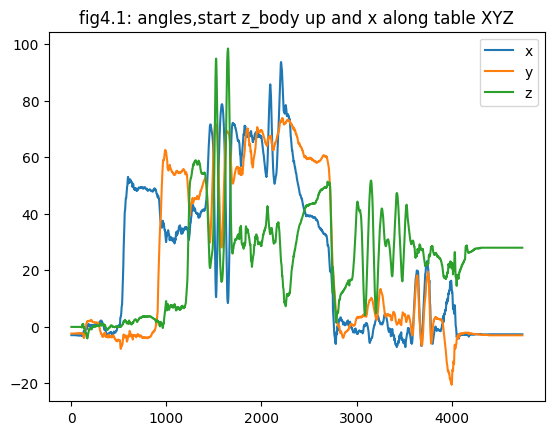

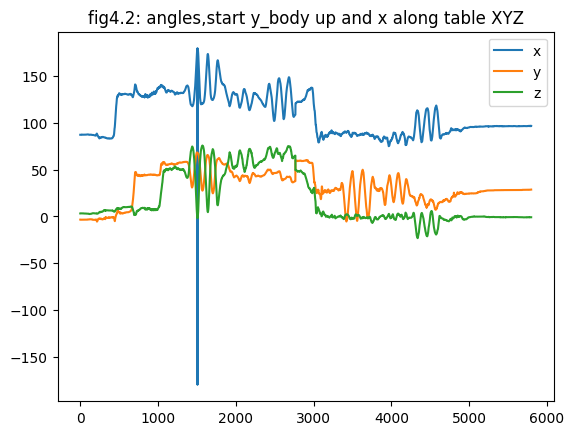

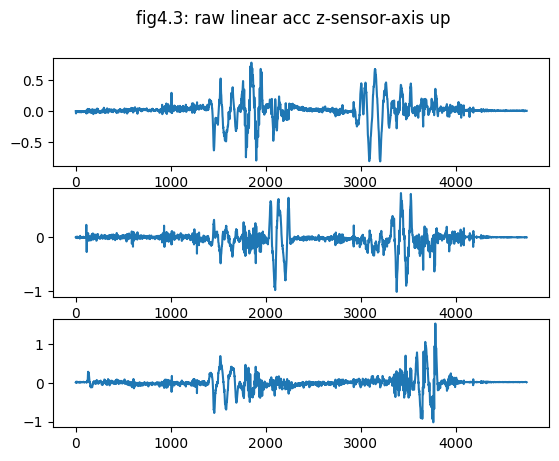

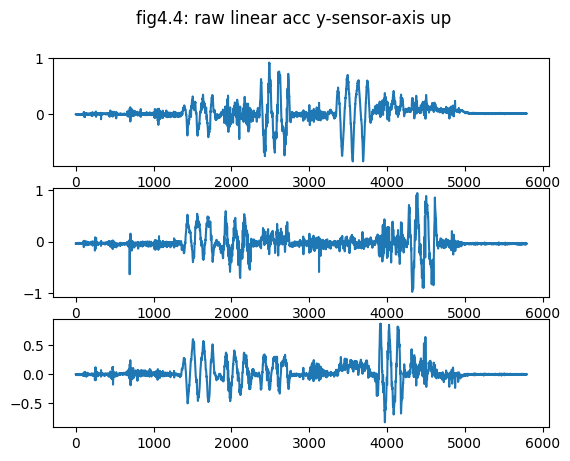

<Figure size 640x480 with 0 Axes>

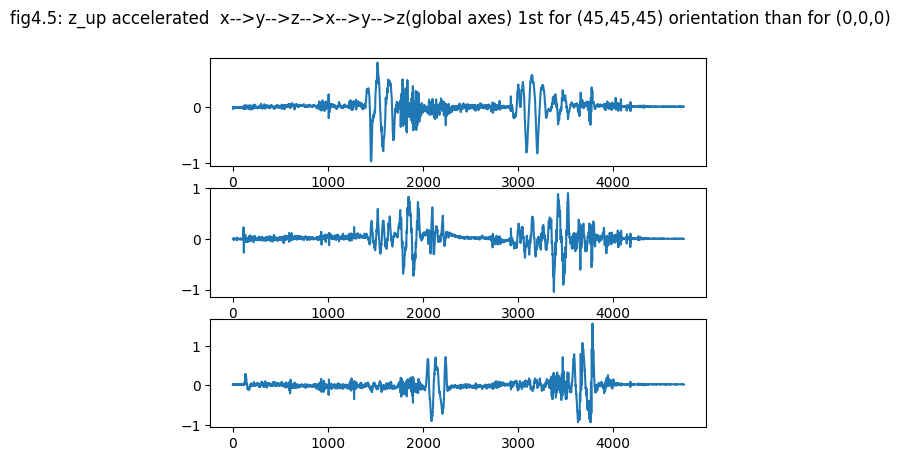

<Figure size 640x480 with 0 Axes>

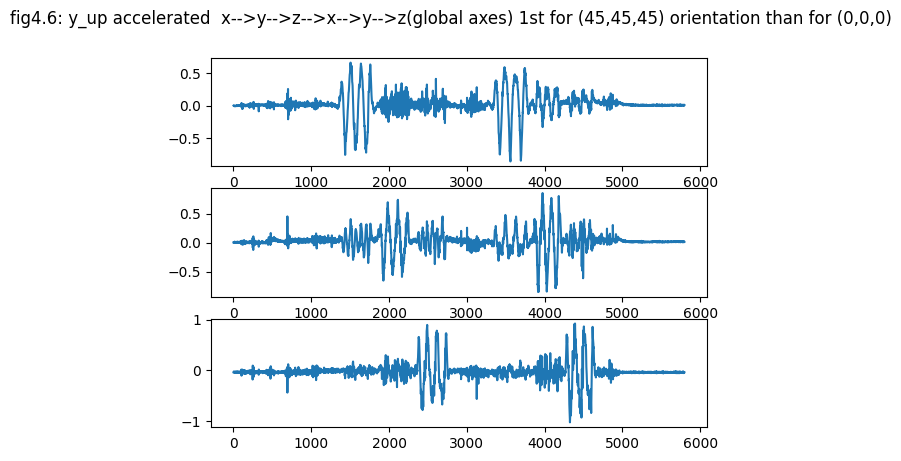

In [13]:
# PRESENT angles calculated from the sensor quaternions 
## measurements

# present "fig4.1: start z_body up and x along table"
angles1=r_z_up.as_euler(seq=SEQ, degrees=True)
pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
plt.figure()
plt.plot(pitch_from_quat)
plt.plot(roll_from_quat)
plt.plot(yaw_from_quat)
plt.legend(['x','y','z'])
plt.title('fig4.1: angles,start z_body up and x along table '+SEQ)
plt.show()

# present "fig4.2: start y_body up and x along table"
angles1=r_y_up.as_euler(seq=SEQ, degrees=True)
pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
plt.figure()
plt.plot(pitch_from_quat)
plt.plot(roll_from_quat)
plt.plot(yaw_from_quat)
plt.legend(['x','y','z'])
plt.title('fig4.2: angles,start y_body up and x along table '+SEQ)
plt.show()

# present "fig4.3: raw acc z up 
f,ax=plt.subplots(3)
ax[0].plot(LA_z_up[:,0])
ax[1].plot(LA_z_up[:,1])
ax[2].plot(LA_z_up[:,2])
# plt.legend(['x','y','z'])
plt.suptitle('fig4.3: raw linear acc z-sensor-axis up')
plt.show()

# present "fig4.4: raw acc y up 
f,ax=plt.subplots(3)
ax[0].plot(LA_y_up[:,0])
ax[1].plot(LA_y_up[:,1])
ax[2].plot(LA_y_up[:,2])
# plt.legend(['x','y','z'])
plt.suptitle('fig4.4: raw linear acc y-sensor-axis up')
plt.show()


# present "fig4.5: 
plt.figure()
f,ax=plt.subplots(3)
ax[0].plot(LA_rot_z_up[:,0])
ax[1].plot(LA_rot_z_up[:,1])
ax[2].plot(LA_rot_z_up[:,2])
plt.suptitle('fig4.5: z_up accelerated  x-->y-->z-->x-->y-->z(global axes) 1st for (45,45,45) orientation than for (0,0,0)')
plt.show()

# present "fig4.6: 
plt.figure()
f,ax=plt.subplots(3)
ax[0].plot(LA_rot_y_up[:,0])
ax[1].plot(LA_rot_y_up[:,1])
ax[2].plot(LA_rot_y_up[:,2])
plt.suptitle('fig4.6: y_up accelerated  x-->y-->z-->x-->y-->z(global axes) 1st for (45,45,45) orientation than for (0,0,0)')
plt.show()


### Example5: checking heading
will create 2 measurement:
**the global axes**- x_global(along the table, always the same), z_global(up)
1.  * we started (0,0,0)
    * rotated about 90 deg on positive global z
    * rotated about -90 deg on positive global z back to (0,0,0)
    * and rotatde about -90 deg on positive global z back to (0,0,-90)
    * fileQ='heading_regular_B3_2023-04-18T10.49.25.574_C3B38AD76217_Quaternion.csv'
    * fileLA='heading_regular_B3_2023-04-18T10.49.25.574_C3B38AD76217_LinearAcceleration.csv'
    
2.  * we started (0,0,0)
    * rotated to (45,45,45)
    * rotated about 90 deg on positive global z
    * rotated about -90 deg on positive global z back to (0,0,0)
    * and rotatde about -90 deg on positive global z back to (0,0,-90)




2.  the same as example 3.2 but slow

fileQ='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_Quaternion.csv'

fileLA='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_LinearAcceleration.csv'

In [ ]:
# # load files
# path='./data/'
# fileQ_z_up='xyz_acc_rotated_than no_rotated_slow_3B3_2023-04-16T07.24.29.892_C3B38AD76217_Quaternion.csv'
# fileLA_z_up='xyz_acc_rotated_than no_rotated_slow_3B3_2023-04-16T07.24.29.892_C3B38AD76217_LinearAcceleration.csv'

# fileQ_y_up='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_Quaternion.csv'
# fileLA_y_up='xyz_acc_rotated_than_no_rotated_y_up_slow_3B3_2023-04-16T07.28.04.237_C3B38AD76217_LinearAcceleration.csv'

# cols=['epoch','time','elapsed']
# colsQ=cols+['qw','qx','qy','qz']
# colsLA=cols+['ax','ay','az']
# dfQ_z_up=pd.read_csv(path+fileQ_z_up,names=colsQ)
# dfLA_z_up=pd.read_csv(path+fileLA_z_up,names=colsLA)

# dfQ_y_up=pd.read_csv(path+fileQ_y_up,names=colsQ)
# dfLA_y_up=pd.read_csv(path+fileLA_y_up,names=colsLA)

In [ ]:
# # create scipy.Rotate object from quaternions measurements
# r_z_up=R.from_quat(dfQ_z_up.iloc[1:,[4,5,6,3]])
# r_y_up=R.from_quat(dfQ_y_up.iloc[1:,[4,5,6,3]])

# # define 
# SEQ='XYZ'

# # rotate linear acceleration
# LA_z_up=dfLA_z_up.iloc[1:,[3,4,5]].to_numpy(dtype=np.float32)
# LA_rot_z_up=r_z_up.apply(LA_z_up,inverse=False)

# LA_y_up=dfLA_y_up.iloc[1:,[3,4,5]].to_numpy(dtype=np.float32)
# LA_rot_y_up=r_y_up.apply(LA_y_up,inverse=False)

In [ ]:
# # PRESENT angles calculated from the sensor quaternions 
# ## measurements

# # present "fig4.1: start z_body up and x along table"
# angles1=r_z_up.as_euler(seq=SEQ, degrees=True)
# pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
# plt.figure()
# plt.plot(pitch_from_quat)
# plt.plot(roll_from_quat)
# plt.plot(yaw_from_quat)
# plt.legend(['x','y','z'])
# plt.title('fig4.1: angles,start z_body up and x along table '+SEQ)
# plt.show()

# # present "fig4.2: start y_body up and x along table"
# angles1=r_y_up.as_euler(seq=SEQ, degrees=True)
# pitch_from_quat, roll_from_quat, yaw_from_quat=angles1[:,0], angles1[:,1],angles1[:,2]
# plt.figure()
# plt.plot(pitch_from_quat)
# plt.plot(roll_from_quat)
# plt.plot(yaw_from_quat)
# plt.legend(['x','y','z'])
# plt.title('fig4.2: angles,start y_body up and x along table '+SEQ)
# plt.show()

# # present "fig4.3: raw acc z up 
# f,ax=plt.subplots(3)
# ax[0].plot(LA_z_up[:,0])
# ax[1].plot(LA_z_up[:,1])
# ax[2].plot(LA_z_up[:,2])
# # plt.legend(['x','y','z'])
# plt.suptitle('fig4.3: raw linear acc z-sensor-axis up')
# plt.show()

# # present "fig4.4: raw acc y up 
# f,ax=plt.subplots(3)
# ax[0].plot(LA_y_up[:,0])
# ax[1].plot(LA_y_up[:,1])
# ax[2].plot(LA_y_up[:,2])
# # plt.legend(['x','y','z'])
# plt.suptitle('fig4.4: raw linear acc y-sensor-axis up')
# plt.show()


# # present "fig4.5: 
# plt.figure()
# f,ax=plt.subplots(3)
# ax[0].plot(LA_rot_z_up[:,0])
# ax[1].plot(LA_rot_z_up[:,1])
# ax[2].plot(LA_rot_z_up[:,2])
# plt.suptitle('fig4.5: z_up accelerated  x-->y-->z-->x-->y-->z(global axes) 1st for (45,45,45) orientation than for (0,0,0)')
# plt.show()

# # present "fig4.6: 
# plt.figure()
# f,ax=plt.subplots(3)
# ax[0].plot(LA_rot_y_up[:,0])
# ax[1].plot(LA_rot_y_up[:,1])
# ax[2].plot(LA_rot_y_up[:,2])
# plt.suptitle('fig4.6: y_up accelerated  x-->y-->z-->x-->y-->z(global axes) 1st for (45,45,45) orientation than for (0,0,0)')
# plt.show()


# Appendix

## Rotation.from_quat( quat)
scipy.spatial.transform.Rotation.from_quat

* **quat**-shape=(N,4), order-->x,y,z,w

## Rotation.from_euler(seq,angles,degrees=False)
scipy.spatial.transform.Rotation.from_euler

* **seq**- string,  {‘X’, ‘Y’, ‘Z’} will represent intinsic(axes changes during rotation) and {‘x’, ‘y’, ‘z’} extrinsic rotation(global unchanged axes)

* **angles**- shape=(N,[ /1/2/3]), in radians (if **degrees**=False)

* **degrees**- If True, then the given angles are assumed to be in degrees. Default is False.

## Rotation.as_quat(self)

The mapping from quaternions to rotations is two-to-one, i.e. quaternions q and -q, where -q simply reverses the sign of each component, represent the same spatial rotation. The returned value is in scalar-last (x, y, z, w) format.

* **Return**:
    **quat**:ndarray, shape=(N,4)

## Rotation.as_euler(self,seq,defrees=False)

The mapping from quaternions to rotations is two-to-one, i.e. quaternions q and -q, where -q simply reverses the sign of each component, represent the same spatial rotation. The returned value is in scalar-last (x, y, z, w) format.

* **Parameters**:
    * **seq**-3 characters belonging to the set {‘X’, ‘Y’, ‘Z’} for intrinsic rotations, or {‘x’, ‘y’, ‘z’} for extrinsic rotations
    * **degrees**-Returned angles are in degrees if this flag is True, else they are in radians. Default is False.
* **Return**:
    * **angles**:ndarray, shape=(N,3)
        * First angle belongs to [-180, 180] degrees
        * Third angle belongs to [-180, 180] degrees
        * Second angle belongs to:[-90, 90] degrees if all axes are different (like xyz)

    

## Rotation.apply(self,vectors,inverse=False)

If the original frame rotates to the final frame by this rotation, then its application to a vector can be seen in two ways:

* As a projection of vector components expressed in the final frame to the original frame.

* As the physical rotation of a vector being glued to the original frame as it rotates. In this case the vector components are expressed in the original.

* **Parameters**:
    * **vectors**-3 characters belonging to the set {‘X’, ‘Y’, ‘Z’} for intrinsic rotations, or {‘x’, ‘y’, ‘z’} for extrinsic rotations
    * **inverse**-Returned angles are in degrees if this flag is True, else they are in radians. Default is False.
* **Return**:
    * **angles**:ndarray, shape=(N,3)
        * First angle belongs to [-180, 180] degrees
        * Third angle belongs to [-180, 180] degrees
        * Second angle belongs to:[-90, 90] degrees if all axes are different (like xyz)